In [44]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

d = load_boston()
# data = pd.read_csv(load_boston(), skiprows=1)

In [6]:
print(d['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Необходимо предсказать MEDV это среднее значение домов занятых владельнцами на $1000
От чего может зависеть ?
Какие колонки могут влиять? 
CRIM +
ZN + Доля земли занятой жилыми 
INDUS + доля акров нефинансового бизнеса в расчете
CHAS + Фиктивная переменная Чарльз-Ривер (= 1, Если тракт граничит с рекой; 0 в противном случае)
NOX +- ??? концентрация оксидов азота (частей на 10 млн)
RM + среднее количество комнат в одном жилом помещении
AGE + доля занятых собственниками объектов, построенных до 1940 года
DIS + взвешенные расстояния до пяти бостонских центров занятости
RAD + индекс доступности радиальных магистралей
TAX + ставка налога на недвижимость с полной стоимостью за $ 10 000
PTRATIO + соотношение учеников и учителей по городам
B +- 1000 (Bk - 0.63)^2, где Bk-доля чернокожих по городам
LSTAT+ % более низкий статус населения

In [7]:
data = pd.read_csv(d['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Идея - все показатели могут влиять на показатель MEDV и все показатели приведены к числовому значению - значит удобны для анализа. Исключать какие то показатели из анализа нельзя 
Одновременно:
- мы рассматриваем показатель домов занятых владельцами нужно ли рассматривать ZN = 0 - то есть это доля не занятая жилыми
Нам теоретически нужны именно жилые 


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


ZN в большинстве случае равен 0 - скорее всего не удобен для предсказания
CHAS  - увловный индекс - может быть удален 

In [10]:
# Колонки в отдельный список
headers = list(data.columns.values)

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-1.000000,-0.64,-0.864370,-1.0,-0.370370,0.155011,0.283213,-0.461594,-1.000000,-0.583969,-0.425532,1.000000,-0.820640,-0.155556
1,-0.999528,-1.00,-0.515396,-1.0,-0.654321,0.095995,0.565396,-0.302076,-0.913043,-0.790076,0.106383,1.000000,-0.591060,-0.262222
2,-0.999529,-1.00,-0.515396,-1.0,-0.654321,0.388772,0.198764,-0.302076,-0.913043,-0.790076,0.106383,0.979475,-0.873068,0.320000
3,-0.999414,-1.00,-0.873900,-1.0,-0.699588,0.317111,-0.116375,-0.102911,-0.826087,-0.866412,0.297872,0.988552,-0.933223,0.262222
4,-0.998590,-1.00,-0.873900,-1.0,-0.699588,0.374210,0.056643,-0.102911,-0.826087,-0.866412,0.297872,1.000000,-0.801325,0.386667


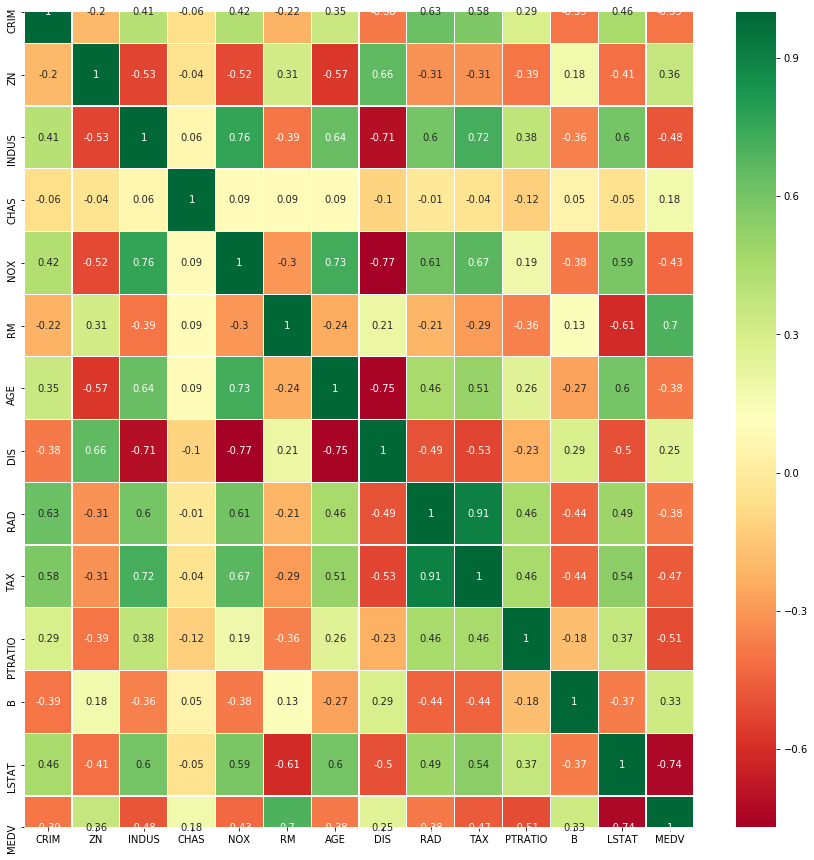

In [12]:
f, ax = plt.subplots(figsize=(15, 15))
corr = np.round_(df_norm.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

ИНдекс доступности магистралей метро коррелируется 0.91 с налогами 

In [45]:
x, y = data.drop(['MEDV'], axis=1), data.MEDV
x_norm, y_norm = df_norm.drop(['MEDV'], axis=1), df_norm.MEDV

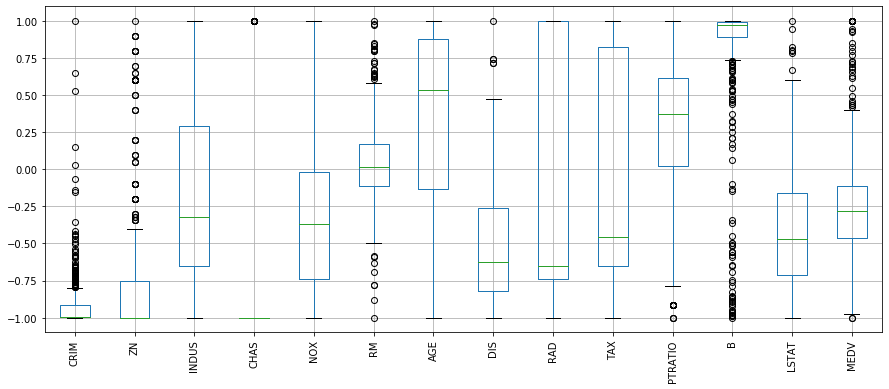

In [16]:
boxplot = df_norm.boxplot(figsize=(15,6), rot=90)

In [60]:
# Проверяем на нормализованных данных
X_train,X_test,y_train,y_test = train_test_split(x_norm,
                                                 y_norm,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [61]:

regression_model = LinearRegression()

regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7147895265576845
RMSE: 	 0.21049939946889532
MAE: 	 0.15113373140435513


In [58]:
# Проверяем на не нормализованных данных
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7147895265576839
RMSE: 	 4.736236488050149
MAE: 	 3.4005089565979922


На нормализованных данных ошибка значительно ниже


In [69]:
#ZN в большинстве случае равен 0 - скорее всего не удобен для предсказания CHAS - увловный индекс - может быть удален
x_norm_drop = x_norm.drop(["ZN","CHAS"], axis=1)
# Проверяем на нормализованных данных
X_train,X_test,y_train,y_test = train_test_split(x_norm_drop,
                                                 y_norm,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.720001019054386
RMSE: 	 0.20856736374692034
MAE: 	 0.15226738483472568


ПОЛУЧАЕМ НЕБОЛЬШОЕ УЛУЧШЕНИЕ МОДЕЛИ